In [29]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 

In [30]:
comment = pd.read_csv('test50.csv')  

In [31]:
comment

Отзывы разметка
0   Очень разочарован QPhone. Ожидал, что квантовы...        -
1   Очень быстро разряжается. Просто полное разоча...        -
2   Ну что тут сказать, телефон хороший, флагман т...        +
3   QPhone Pro MAX просто бомба! Быстрее любого см...        +
4   Слишком дорого для массового рынка – не каждый...        -
5   Многие приложения несовместимы с квантовой арх...        -
6                 Точно буду советовать своим друзьям        +
7   За три месяца так и не смог привыкнуть к интер...        -
8   С каждым обновлением кажется, что работает всё...        -
9   Не берите Qphone pro Max. Только деньги потратите        -
10  Скорость – просто огонь, но если сравнивать с ...        +
11  Телефон кипит нагревается когда работает на ру...        -
12  После QPhone Pro MAX обычные смартфоны кажутся...        +
13  Наверное для фотографирования котиков он не оч...        +
14  На вид очень стильный, но отпечатки на экране ...        -
15  Для меня Rapid Quantum Calculations – это уже ...        +
16  QPhone Pro MAX не поддерживает мои старые науш...        -
17  Rapid Quantum подняли планку на новый уровень....        +
18  QPhone Pro MAX работает быстрее, чем я успеваю...        +
19  Я бы не сказал, что на данном этапе это обязат...        -
20  Взял QPhone просто из любопытства, работает не...        -
21  Интерфейс иногда сбоит. Похоже, квантовая техн...        -
22  Для первого поколения вполне ок, но видно, что...        +
23  Очень радует быстрая зарядка: до 100% за полча...        +
24  Квантовая многозадачность – это то, чего мне н...        +
25  Реально впечатляет, насколько всё быстро грузи...        +
26  Часто сбоит камера: фокусировка занимает много...        -
27                                        Бесполезный        -
28  Люблю Rapid Quantum Calculations! QPhone оказа...        +
29  переплата за бренд! тормозит! также как и все ...        -
30  Привлёк мощный маркетинг, но пока не нашёл сер...        +
31  Честно? Не чувствую разницы в повседневном исп...        -
32  Это отличный телефон за свои деньги. Отличный ...        +
33  Обслуживание QPhone Pro MAX – это квест, Rapid...        -
34  Через три месяца заметил, что экран стал мерца...        -
35  Пользуюсь уже пару месяцев, и знаете, пока ни ...        +
36  Динамики не самые хорошие. Круто, что телефон ...        -
37               Не стоит своих денег от слова совсем        -
38  ПО немного сырое, есть мелкие неприятные пробл...        -
39  Уже подумываю, чтобы сменить на что-то другое....        -
40  Отличное устройство, которое выделяется среди ...        +
41          Классная задумка, но реализация подкачала        -
42  Фанатею от Rapid Quantum Calculations! Каждый ...        +
43  Неплохой телефон, но явно требует доработки. Ж...        -
44  QPhone Pro MAX просто шик! Никаких лагов, толь...        +
45  Не тормозит, компактный, легкий, удобно держат...        +
46  Телефон только для увлечённых наукой. Обычному...        +
47  QPhone от Rapid Quantum Calculations – настоящ...        +
48  Слишком дорогой для простых смертных. Не кажды...        -
49  Заплатил кучу денег, а толку ноль. Телефон не ...        -

In [32]:
good_lib = np.array(0)
with open("хорошие.txt", encoding="utf-8") as file:
    for item in file:
        good_lib = np.append(good_lib, str(item).replace("\n",""))
good_lib = np.delete(good_lib,0)

bad_lib = np.array(0)
with open("плохие.txt", encoding="utf-8") as file:
    for item in file:
        bad_lib = np.append(bad_lib, str(item).replace("\n",""))
bad_lib = np.delete(bad_lib,0)
bad_lib

array(['аборт', 'абсурд', 'абсурдно', ..., 'язвительный', 'яростный',
       'ярость'], dtype='<U24')

In [33]:
good_lib = np.append(good_lib, "находка")
bad_lib = np.append(bad_lib, "но")
bad_lib = np.append(bad_lib, "ну")
bad_lib = np.append(bad_lib, "приходится")

In [34]:
                # СОЗДАНИЕ ДИСКРЕТНОЙ СТРОКИ БЕЗ ЗНАКОВ ПРЕПИНАНИЯ И ПРОБЕЛОВ
def build_decretal_comment(comment_string):
    comment_string = str(comment_string)
    comment_string = comment_string.replace('.', '')          #удаление точки
    comment_string = comment_string.replace(',', '')          #удаление точки
    comment_string = comment_string.replace('!', '')
    comment_string = comment_string.replace('(', '')
    comment_string = comment_string.replace(')', '')
    comment_string = comment_string.lower()
    # ВОПРОСИТЕЛЬНЫЙ ЗНАК
    comment_string = comment_string.split(' ')
    return comment_string    

In [35]:
def comment_to_coordinate1(comment_boolean, good_lib, bad_lib):
    comment_boolean = np.array(comment_boolean)
    bad_lib = np.array(bad_lib)
    good_lib = np.array(good_lib)
    good_count = np.sum(np.isin(comment_boolean, good_lib))
    bad_count = np.sum(np.isin(comment_boolean, bad_lib))
    gb_coordinate = np.array([good_count, bad_count]) / len(comment_boolean)
    return gb_coordinate

In [36]:
def word_checker(word_comment, word_lib, procent):
    identity = False
    word_lib = str(word_lib)
    word_comment = str(word_comment)
    if len(word_lib) < len(word_comment):
        bigger = word_comment
        smaller = word_lib
    else:
        bigger = word_lib 
        smaller = word_comment
    for i in range(len(smaller)):
        
        if smaller[i] != bigger[i]:
            if i/len(bigger)>= procent:
                identity = True
            break
    return identity

In [37]:
def comment_to_coordinate_procent(comment_boolean, good_lib, bad_lib, procent):
    gb_coordinate = [0, 0]
    total_comments = len(comment_boolean)

    if total_comments == 0:
        return gb_coordinate  # Возвращаем [0, 0], если нет комментариев

    
    for i in range(total_comments):   # по каждому слову в комментарии
        if comment_boolean[i] == "не" and i!=total_comments-1:   # если есть не
            for word_in_glib in good_lib:                        # по каждому слову в словаре хороштх для сравнения слов
                
                if (word_checker(comment_boolean[i+1], word_in_glib, procent)):
                    gb_coordinate[0]+=1
                    break
            for word_in_blib in bad_lib:                        # по каждому слову в словаре плохих для сравнения слов
                
                if (word_checker(comment_boolean[i+1], word_in_blib, procent)):
                    gb_coordinate[1]+=1
                    break
            break
                    
        
        for word_in_glib in good_lib:                        # по каждому слову в словаре хороштх для сравнения слов
                
            if (word_checker(comment_boolean[i], word_in_glib, procent)):
                gb_coordinate[0]+=1
                break            
        
        for word_in_blib in bad_lib:                        # по каждому слову в словаре плохих для сравнения слов
                
            if (word_checker(comment_boolean[i], word_in_blib, procent)):
                gb_coordinate[1]+=1
                break
            
    gb_coordinate[0] = gb_coordinate[0]/total_comments * len(good_lib) 
    gb_coordinate[1] = gb_coordinate[1]/total_comments * len(bad_lib)

    return gb_coordinate


In [38]:
gb = []
percent = 0.65
for comment_i in (comment["Отзывы"]):
    
    comment_decretal = build_decretal_comment(comment_i)
    gb.append(comment_to_coordinate_procent(comment_decretal, good_lib, bad_lib, percent))

красный - негативные, синий - пложительные


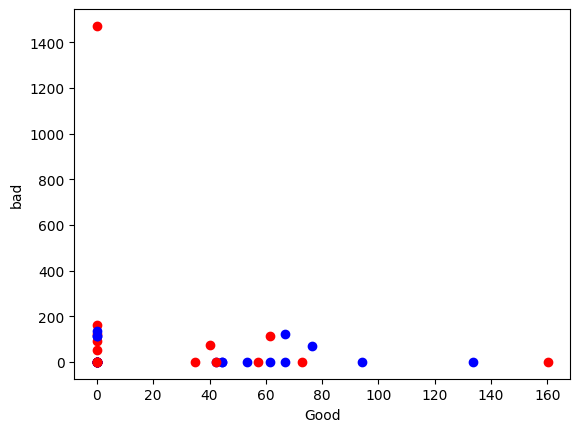

In [39]:
x_axes_data = []
y_axes_data = []
for i in range(len(comment)):
    if comment["разметка"][i] == "+":
        y_axes_data.append(1)
        color = "blue"
    else:
        y_axes_data.append(-1)
        color = "red"
    x_axes_data.append([gb[i][0], gb[i][1]])
    
    plt.scatter(gb[i][0], gb[i][1], color = color)
print("красный - негативные, синий - пложительные")
plt.xlabel("Good")
plt.ylabel("bad")
plt.show()

In [40]:
#x_axes_data = np.array(x_axes_data)
#y_axes_data = np.array(y_axes_data)
for i in range (len(x_axes_data)):
    print(x_axes_data[i], gb[i], y_axes_data[i])


[40.050000000000004, 73.60000000000001] [40.050000000000004, 73.60000000000001] -1
[34.826086956521735, 0.0] [34.826086956521735, 0.0] -1
[0.0, 0.0] [0.0, 0.0] 1
[44.5, 0.0] [44.5, 0.0] 1
[0.0, 0.0] [0.0, 0.0] -1
[0.0, 163.55555555555554] [0.0, 163.55555555555554] -1
[0.0, 0.0] [0.0, 0.0] 1
[0.0, 0.0] [0.0, 0.0] -1
[0.0, 92.0] [0.0, 92.0] -1
[0.0, 0.0] [0.0, 0.0] -1
[66.75, 122.66666666666666] [66.75, 122.66666666666666] 1
[0.0, 0.0] [0.0, 0.0] -1
[0.0, 113.23076923076924] [0.0, 113.23076923076924] 1
[0.0, 0.0] [0.0, 0.0] 1
[0.0, 0.0] [0.0, 0.0] -1
[0.0, 0.0] [0.0, 0.0] 1
[72.81818181818183, 0.0] [72.81818181818183, 0.0] -1
[66.75, 0.0] [66.75, 0.0] 1
[53.4, 0.0] [53.4, 0.0] 1
[0.0, 0.0] [0.0, 0.0] -1
[57.21428571428571, 0.0] [57.21428571428571, 0.0] -1
[0.0, 0.0] [0.0, 0.0] -1
[0.0, 0.0] [0.0, 0.0] 1
[94.23529411764706, 0.0] [94.23529411764706, 0.0] 1
[0.0, 0.0] [0.0, 0.0] 1
[133.5, 0.0] [133.5, 0.0] 1
[0.0, 122.66666666666666] [0.0, 122.66666666666666] -1
[0.0, 1472.0] [0.0, 1472.0] 

In [41]:
with open(f"x_axes_{percent}.txt", "w") as output:
    output.write(str(x_axes_data))
    
with open(f"y_axes_{percent}.txt", "w") as output:
    output.write(str(y_axes_data))